In [1]:
import numpy as np
import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt

from mi_modulo import *

In [21]:
# Cargar datasets
animales = pd.read_csv("animales_eeg.csv")
alimentos = pd.read_csv("alimentos_eeg.csv")
herramientas = pd.read_csv("herramientas_eeg.csv")

In [22]:
# Matrices de conectividad - correlación --> no se puede coherencia espectral, son estímulos determinados
eeg_animales = animales.loc[:, 'Fp1':]
eeg_alimentos = alimentos.loc[:, 'Fp1':]
eeg_herramientas = herramientas.loc[:, 'Fp1':]

corr_animales = eeg_animales.corr()
corr_alimentos = eeg_alimentos.corr()
corr_herramientas = eeg_herramientas.corr()

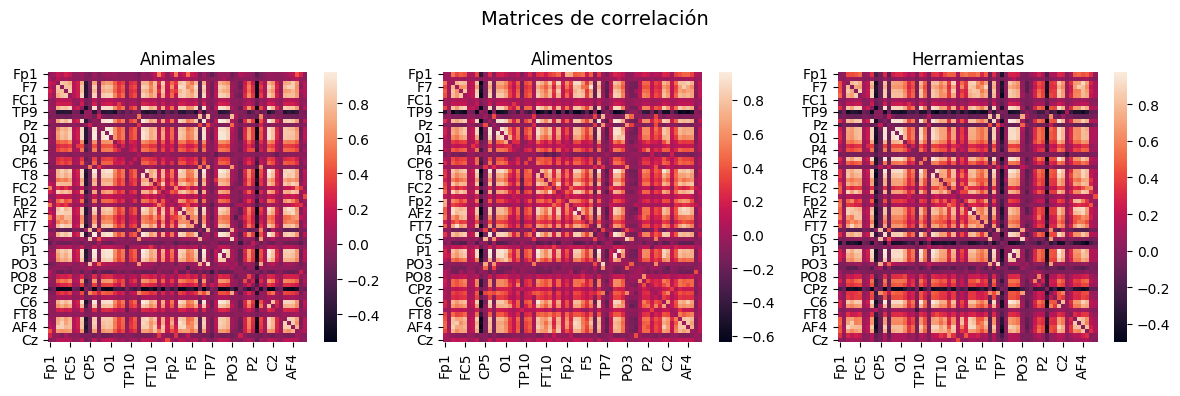

In [23]:
# Comparativa matrices de conectividad - hecha con correlación

np.fill_diagonal(corr_animales.values, 0)
np.fill_diagonal(corr_alimentos.values, 0)
np.fill_diagonal(corr_herramientas.values, 0)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.heatmap(corr_animales, ax=axes[0])
axes[0].set_title("Animales")

sns.heatmap(corr_alimentos, ax=axes[1])
axes[1].set_title("Alimentos")

sns.heatmap(corr_herramientas, ax=axes[2])
axes[2].set_title("Herramientas")

fig.suptitle("Matrices de correlación", fontsize=14)
plt.tight_layout()
plt.show()

## Generación de estadísticos

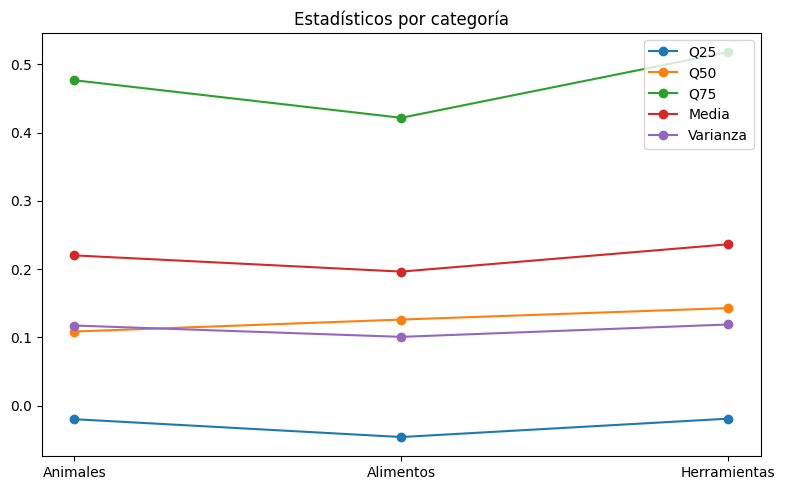

In [37]:
matrices = {
    "Animales": corr_animales,
    "Alimentos": corr_alimentos,
    "Herramientas": corr_herramientas
}

th25, th50, th75 = [], [], []
promedio, varianza = [], []
categorias = []

for nombre, matriz in matrices.items():
    data = matriz.stack().values
    categorias.append(nombre)
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(categorias, th25, marker='o', label="Q25")
ax.plot(categorias, th50, marker='o', label="Q50")
ax.plot(categorias, th75, marker='o', label="Q75")
ax.plot(categorias, promedio, marker='o', label="Media")
ax.plot(categorias, varianza, marker='o', label="Varianza")

ax.set_title("Estadísticos por categoría")
ax.legend()
plt.tight_layout()
plt.show()

## Evaluación de los estadísticos

In [38]:
# Función para filtrar la matriz 
def filter_top_connections(corr_matrix, percentile):
    
    # Create a copy to avoid modifying the original matrix
    filtered_matrix = corr_matrix.copy()

    # Set diagonal to NaN to exclude from percentile calculation
    np.fill_diagonal(filtered_matrix.values, np.nan)

    # Get all off-diagonal values and calculate the threshold
    # Use absolute values for 'strongest' connections
    abs_values = np.abs(filtered_matrix.values[~np.isnan(filtered_matrix.values)])

    # If there are no off-diagonal values, return a matrix of zeros
    if abs_values.size == 0:
        return corr_matrix * 0.0

    threshold = np.percentile(abs_values, 100 - percentile) # Top X% means threshold at 100-X percentile

    # Apply the filter: set values below threshold to 0
    # Also keep values between -threshold and threshold to 0 if they are not above threshold
    filtered_matrix[np.abs(filtered_matrix) < threshold] = 0

    # Set diagonal back to 1 (or 0 if preferred, but 1 is standard for correlation diagonals)
    np.fill_diagonal(filtered_matrix.values, 1.0)

    return filtered_matrix

Text(0.5, 0.98, 'Análisis estadísticos para categoría: animales')

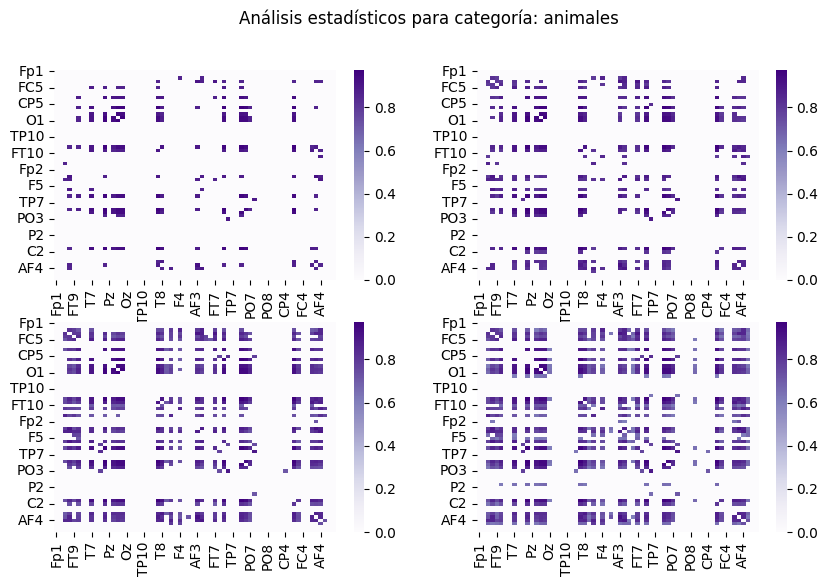

In [99]:
# ANIMALES

np.fill_diagonal(corr_animales.values, 0)

animales_df_1 = filter_top_connections(corr_animales, 5)
animales_df_2 = filter_top_connections(corr_animales, 10)
animales_df_3 = filter_top_connections(corr_animales, 15)
animales_df_4 = filter_top_connections(corr_animales, 20)

fig, axes = plt.subplots(2,2, figsize = (10, 6))

np.fill_diagonal(animales_df_1.values, 0)
sns.heatmap(animales_df_1, ax=axes[0, 0], cmap="Purples")
np.fill_diagonal(animales_df_2.values, 0)
sns.heatmap(animales_df_2, ax=axes[0, 1], cmap="Purples")
np.fill_diagonal(animales_df_3.values, 0)
sns.heatmap(animales_df_3, ax=axes[1, 0], cmap="Purples")
np.fill_diagonal(animales_df_4.values, 0)
sns.heatmap(animales_df_4, ax=axes[1, 1], cmap="Purples")

fig.suptitle('Análisis estadísticos para categoría: animales')

Text(0.5, 0.98, 'Análisis estadísticos para categoría: alimentos')

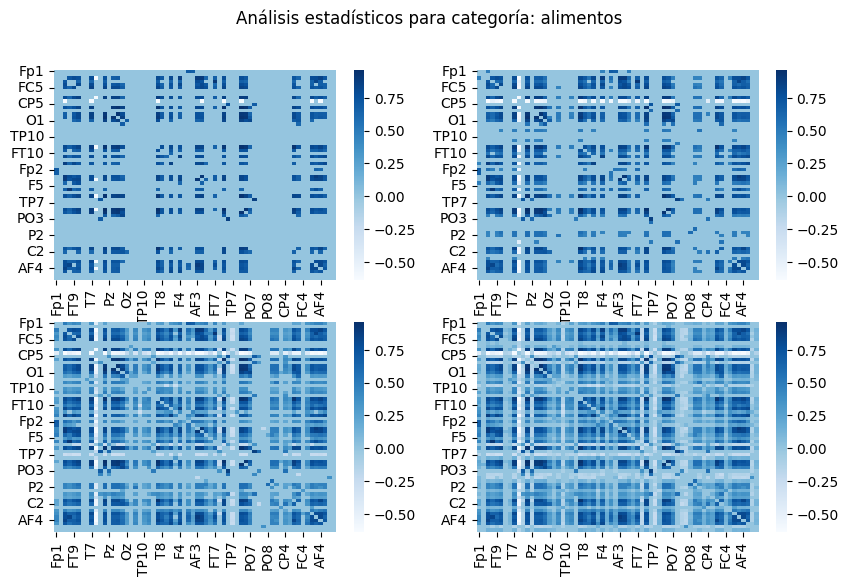

In [79]:
# ALIMENTOS

np.fill_diagonal(corr_alimentos.values, 0)

alimentos_df_1 = filter_top_connections(corr_alimentos, 15)
alimentos_df_2 = filter_top_connections(corr_alimentos, 25)
alimentos_df_3 = filter_top_connections(corr_alimentos, 45)
alimentos_df_4 = filter_top_connections(corr_alimentos, 75)

fig, axes = plt.subplots(2,2, figsize = (10, 6))

np.fill_diagonal(alimentos_df_1.values, 0)
sns.heatmap(alimentos_df_1, ax=axes[0, 0], cmap="Blues")
np.fill_diagonal(alimentos_df_2.values, 0)
sns.heatmap(alimentos_df_2, ax=axes[0, 1], cmap="Blues")
np.fill_diagonal(alimentos_df_3.values, 0)
sns.heatmap(alimentos_df_3, ax=axes[1, 0], cmap="Blues")
np.fill_diagonal(alimentos_df_4.values, 0)
sns.heatmap(alimentos_df_4, ax=axes[1, 1], cmap="Blues")

fig.suptitle('Análisis estadísticos para categoría: alimentos')

Text(0.5, 0.98, 'Análisis estadísticos para categoría: herramientas')

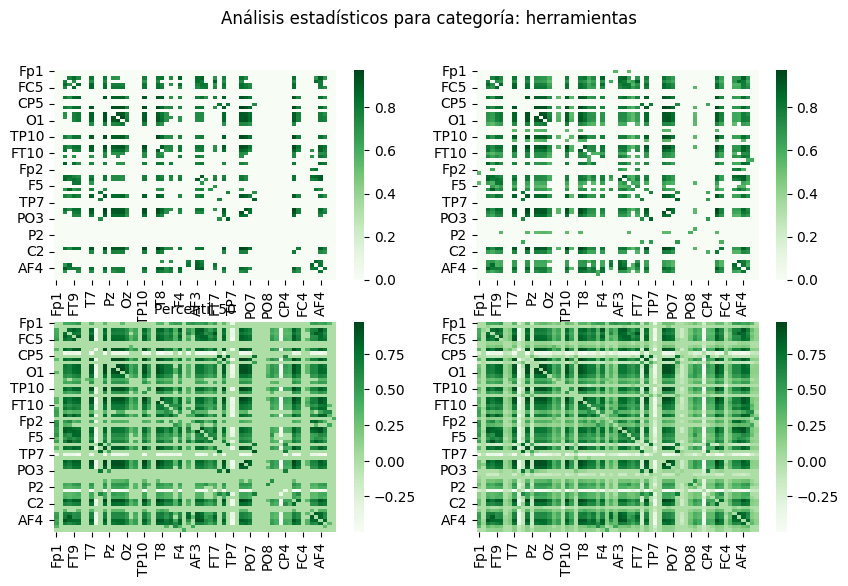

In [77]:
# HERRAMIENTAS

np.fill_diagonal(corr_herramientas.values, 0)

herramientas_df_1 = filter_top_connections(corr_herramientas, 15)
herramientas_df_2 = filter_top_connections(corr_herramientas, 25)
herramientas_df_3 = filter_top_connections(corr_herramientas, 45)
herramientas_df_4 = filter_top_connections(corr_herramientas, 75)

fig, axes = plt.subplots(2,2, figsize = (10, 6))

np.fill_diagonal(herramientas_df_1.values, 0)
sns.heatmap(herramientas_df_1, ax=axes[0, 0], cmap="Greens")
np.fill_diagonal(herramientas_df_2.values, 0)
sns.heatmap(herramientas_df_2, ax=axes[0, 1], cmap="Greens")
np.fill_diagonal(herramientas_df_3.values, 0)
sns.heatmap(herramientas_df_3, ax=axes[1, 0], cmap="Greens")
np.fill_diagonal(herramientas_df_4.values, 0)
sns.heatmap(herramientas_df_4, ax=axes[1, 1], cmap="Greens")
axes[1,0].set_title("Percentil 50", fontsize = 10)
fig.suptitle('Análisis estadísticos para categoría: herramientas')

## Generación de resultados
- grafos 2D
- grafos 3D
- comunidades
- hubs

In [54]:
# Convertir de dataframe a grafo
animales_grafo_ = nx.from_pandas_adjacency(animales_df_3)
alimentos_grafo_ = nx.from_pandas_adjacency(alimentos_df_3)
herramientas_grafo_ = nx.from_pandas_adjacency(herramientas_df_3)

In [55]:
# Cálculo de métricas por condición
(clust_coeff_an, path_length_an, small_world_sigma_an, communities_an, 
 modularity_an, betwenness_an, global_eff_an, local_eff_an, degree_dict_an) = metricas_grafo(animales_grafo_)

(clust_coeff_al, path_length_al, small_world_sigma_al, communities_al, 
 modularity_al, betwenness_al, global_eff_al, local_eff_al, degree_dict_al) = metricas_grafo(alimentos_grafo_)

(clust_coeff_h, path_length_h, small_world_sigma_h, communities_h, 
 modularity_h, betwenness_h, global_eff_h, local_eff_h, degree_dict_h) = metricas_grafo(herramientas_grafo_)

In [57]:
# Coordenadas de los 64 electrodos
# electrodos
ch_names = [
    "Fp1","Fz","F3","F7","FT9","FC5","FC1","C3","T7","TP9","CP5","CP1",
    "Pz","P3","P7","O1","Oz","O2","P4","P8","TP10","CP6","CP2","C4","T8",
    "FT10","FC6","FC2","F4","F8","Fp2","AF7","AF3","AFz","F1","F5","FT7",
    "FC3","C1","C5","TP7","CP3","P1","P5","PO7","PO3","POz","PO4","PO8",
    "P6","P2","CPz","CP4","TP8","C6","C2","FC4","FT8","F6","AF8","AF4",
    "F2","FCz","Cz"
]

# 2. Cargar montaje estándar 10–10
montage = mne.channels.make_standard_montage("standard_1020")

# 3. Obtener diccionario canal -> (x, y, z)
all_pos = montage.get_positions()["ch_pos"]

# 4. Filtrar solo tus canales y construir DataFrame
coords_dict = {ch: all_pos[ch] for ch in ch_names}
eeg_coords = pd.DataFrame(coords_dict, index=["x", "y", "z"]).T

print(eeg_coords.head())

            x         y         z
Fp1 -0.029437  0.083917 -0.006990
Fz   0.000312  0.058512  0.066462
F3  -0.050244  0.053111  0.042192
F7  -0.070263  0.042474 -0.011420
FT9 -0.084076  0.014567 -0.050429


('CPz', 0.024954746072790194)
[frozenset({'P2', 'Fp2', 'O2', 'T7', 'F7', 'AF8', 'FC5', 'C3', 'F6', 'T8', 'FT9', 'TP8', 'P1', 'CP3', 'AFz', 'F3', 'TP9', 'O1', 'F8', 'Cz', 'C6', 'CP1', 'PO8', 'P7', 'FC4', 'FC6', 'F4', 'CP6', 'FT10', 'TP10', 'P4', 'F5', 'FT8', 'P5', 'PO7', 'C4', 'P3', 'Oz', 'FC1', 'AF4', 'C1', 'C2', 'P6', 'AF3', 'F2'}), frozenset({'C5', 'CP4', 'CPz', 'CP2', 'Pz', 'Fz', 'FC2', 'FC3', 'P8', 'FT7', 'CP5', 'AF7', 'TP7', 'POz', 'Fp1', 'PO4', 'PO3', 'FCz', 'F1'})]


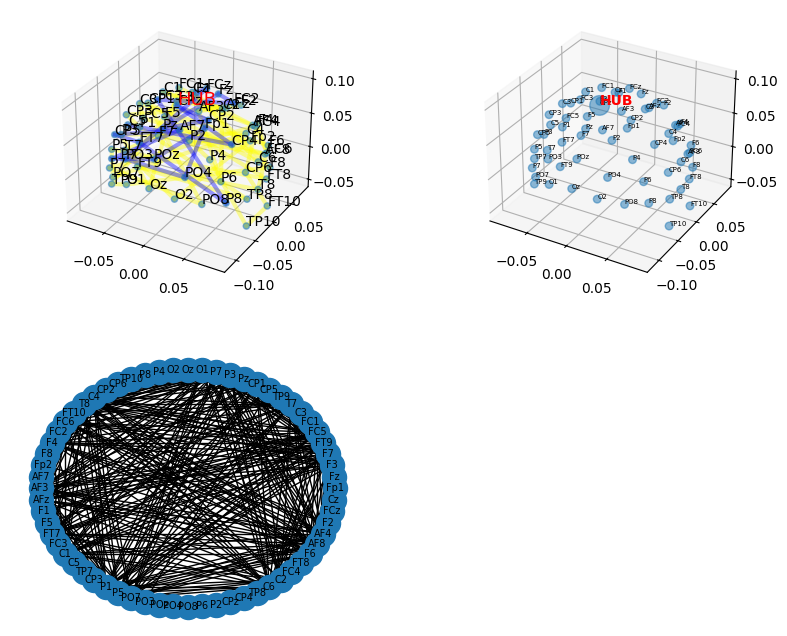

In [102]:
# Grafo de resultados para animales
hub_an = betwenness_an[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]

grafo_comunidades(communities_an, hub_an, eeg_coords, axes[0])
grafo3D(eeg_coords, hub_an, axes[1])
ensayo_grafo = grafo2D(animales_df_3, axes[2])

print(hub_an)
print(communities_an)

('TP9', 0.03313021216543183)
[frozenset({'P2', 'Fp2', 'C3', 'AF8', 'O2', 'FT9', 'TP8', 'P1', 'CP3', 'AFz', 'F3', 'TP9', 'O1', 'F8', 'Cz', 'C6', 'PO8', 'P7', 'F1', 'FC4', 'FC6', 'CP6', 'TP10', 'P4', 'F5', 'P5', 'PO7', 'Fz', 'C4', 'FC1', 'AF4', 'C1', 'C2', 'P6', 'AF3', 'Fp1', 'F2'}), frozenset({'FT10', 'F4', 'C5', 'CP4', 'CP5', 'TP7', 'CP2', 'FT8', 'POz', 'Pz', 'P3', 'Oz', 'FC3', 'PO3'}), frozenset({'P8', 'FT7', 'CPz', 'AF7', 'F7', 'T7', 'FC5', 'F6', 'T8', 'FC2', 'PO4', 'CP1', 'FCz'})]


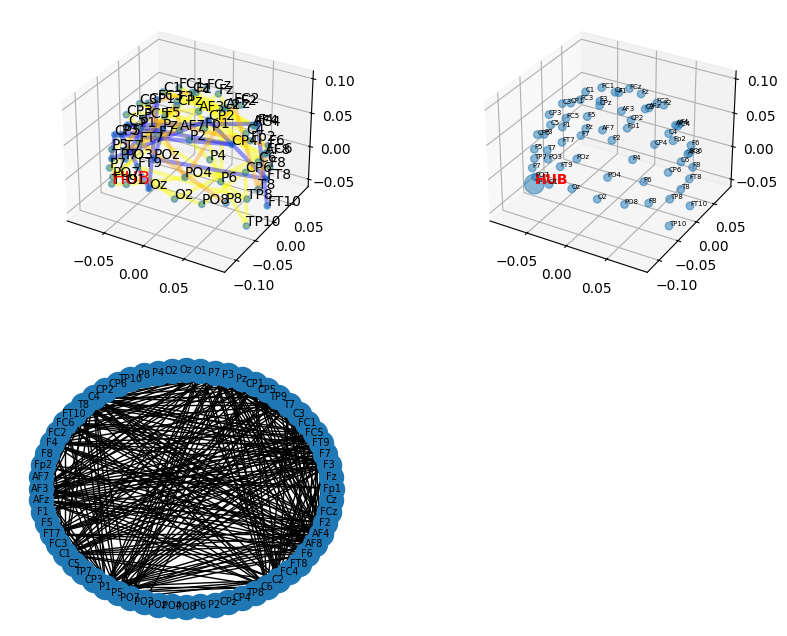

In [90]:
# Grafo de resultados para alimentos
hub_al = betwenness_al[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]

grafo_comunidades(communities_al, hub_al, eeg_coords, axes[0])
grafo3D(eeg_coords, hub_al, axes[1])
ensayo_grafo = grafo2D(alimentos_df_1, axes[2])

print(hub_al)
print(communities_al)

('FT10', 0.03640327155323207)
[frozenset({'P2', 'Fp2', 'C3', 'F7', 'AF8', 'FC5', 'O2', 'F6', 'FT9', 'TP8', 'AFz', 'F3', 'FT7', 'TP7', 'AF7', 'F8', 'Cz', 'PO8', 'F1', 'FC6', 'CP6', 'F4', 'TP10', 'P4', 'F5', 'FT8', 'P5', 'Fz', 'P3', 'Oz', 'FC2', 'AF4', 'P6', 'AF3', 'Fp1', 'PO4', 'F2', 'FCz'}), frozenset({'C5', 'CP4', 'CPz', 'T7', 'Pz', 'PO7', 'C4', 'FC3', 'P1', 'C2', 'CP5', 'O1', 'C6', 'POz', 'CP1', 'P7', 'PO3'}), frozenset({'C1', 'FC4', 'FT10', 'P8', 'TP9', 'CP2', 'T8', 'FC1', 'CP3'})]


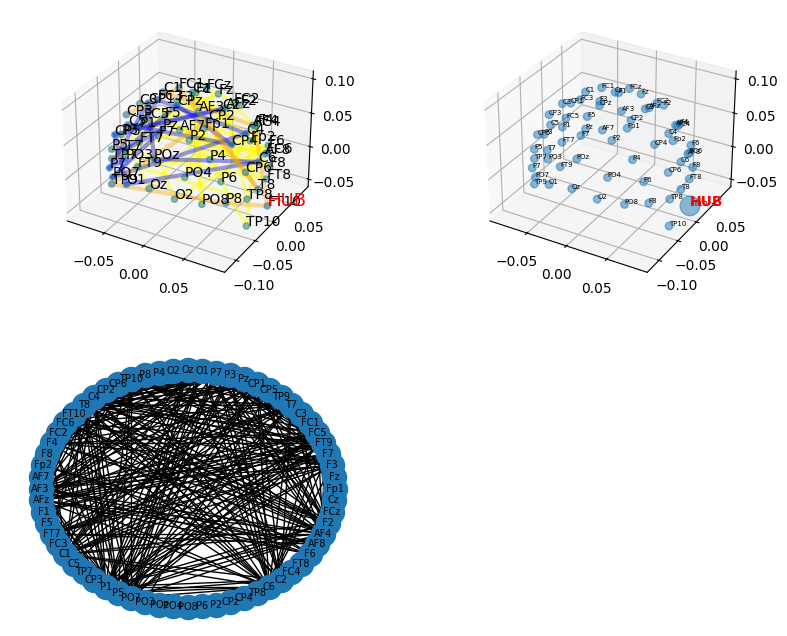

In [93]:
# Grafo de resultados para herramientas
hub_h = betwenness_h[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]

grafo_comunidades(communities_h, hub_h, eeg_coords, axes[0])
grafo3D(eeg_coords, hub_h, axes[1])
ensayo_grafo = grafo2D(herramientas_df_1, axes[2])

print(hub_h)
print(communities_h)

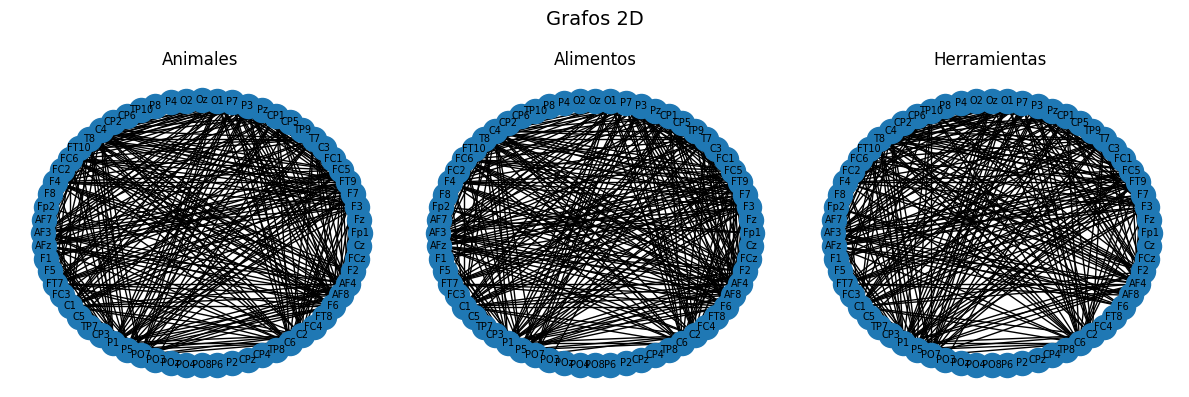

In [103]:
# Comparación grafos 2d
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

ensayo_grafo = grafo2D(animales_df_3, axes[0])
axes[0].set_title("Animales")

ensayo_grafo = grafo2D(alimentos_df_1, axes[1])
axes[1].set_title("Alimentos")

ensayo_grafo = grafo2D(herramientas_df_1, axes[2])
axes[2].set_title("Herramientas")

fig.suptitle("Grafos 2D", fontsize=14)
plt.tight_layout()
plt.show()

Text(0.5, 0.92, 'Herramientas')

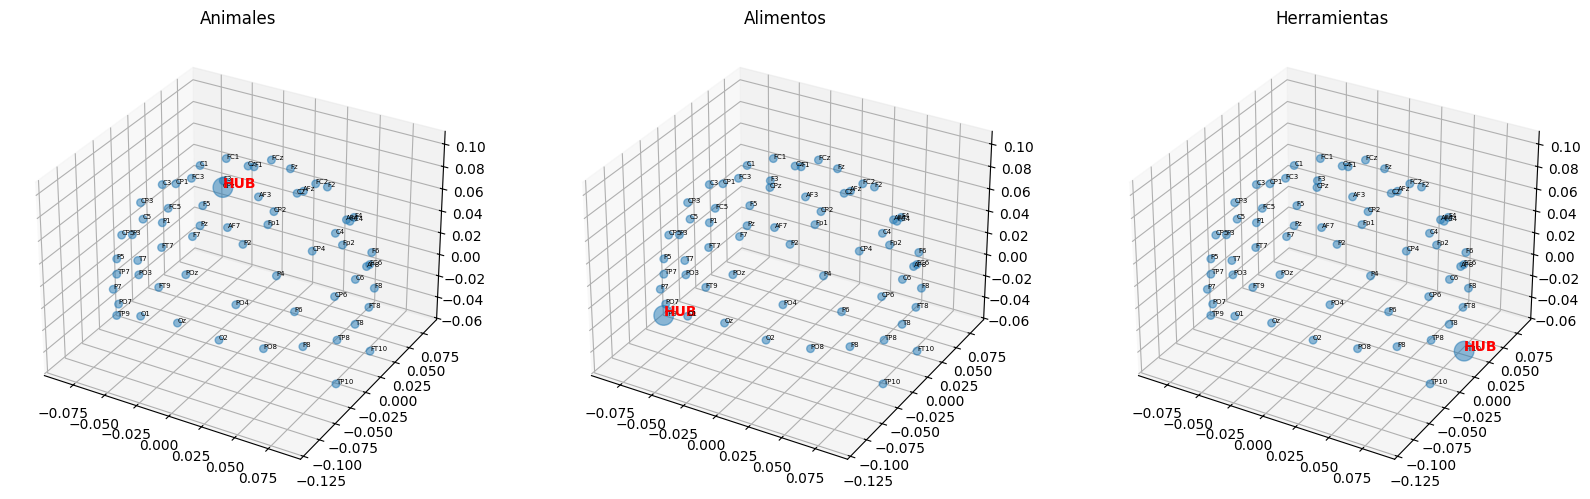

In [116]:
# Comparación grafos 3D

fig = plt.figure(figsize=(20, 15))
axes = [fig.add_subplot(1, 3, 1, projection='3d'), 
        fig.add_subplot(1, 3, 2, projection='3d'),
       fig.add_subplot(1, 3, 3, projection='3d')]

grafo3D(eeg_coords, hub_an, axes[0])
axes[0].set_title("Animales")
grafo3D(eeg_coords, hub_al, axes[1])
axes[1].set_title("Alimentos")
grafo3D(eeg_coords, hub_h, axes[2])
axes[2].set_title("Herramientas")

Text(0.5, 0.92, 'Herramientas')

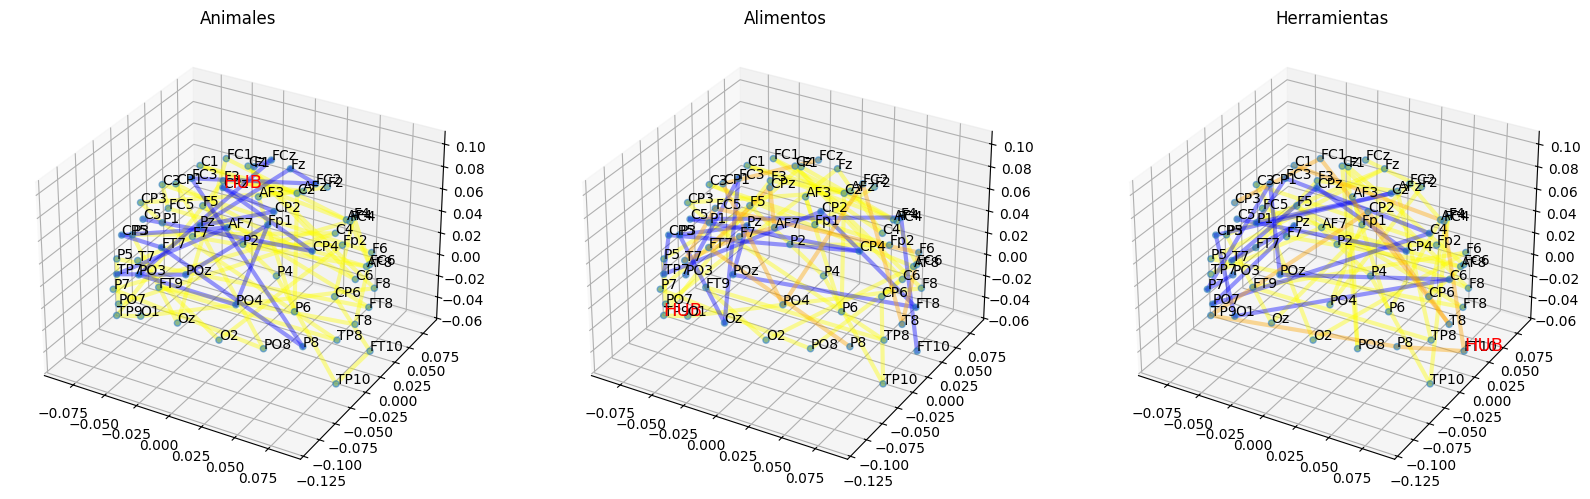

In [117]:
# Comparación grafos comunidades

fig = plt.figure(figsize=(20, 15))
axes = [fig.add_subplot(1, 3, 1, projection='3d'), 
        fig.add_subplot(1, 3, 2, projection='3d'),
       fig.add_subplot(1, 3, 3, projection='3d')]

grafo_comunidades(communities_an, hub_an, eeg_coords, axes[0])
axes[0].set_title("Animales")
grafo_comunidades(communities_al, hub_al, eeg_coords, axes[1])
axes[1].set_title("Alimentos")
grafo_comunidades(communities_h, hub_h, eeg_coords, axes[2])
axes[2].set_title("Herramientas")

In [128]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para proyección 3d
from matplotlib import cm

def plot_grafo_3d(G, coords_df, ax=None, title=None,
                  node_size_base=100, edge_alpha=0.8,
                  cmap_name="YlGnBu"):
    """
    Grafica un grafo 3D:
      - tamaño de nodos proporcional al grado
      - color de aristas según el peso (correlación)
    """
    if ax is None:
        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(111, projection="3d")
    
    # Asegurar que solo usamos nodos que tienen coordenadas
    nodos_validos = [n for n in G.nodes if n in coords_df.index]
    G = G.subgraph(nodos_validos).copy()
    
    # --- Grados (para tamaños de nodos) ---
    degree_dict = dict(G.degree())  # grado no ponderado
    # Si quieres grado ponderado: G.degree(weight="weight")
    
    # Normalizar tamaños
    max_degree = max(degree_dict.values()) if degree_dict else 1
    node_sizes = []
    xs, ys, zs = [], [], []
    
    for n in G.nodes():
        xs.append(coords_df.loc[n, "x"])
        ys.append(coords_df.loc[n, "y"])
        zs.append(coords_df.loc[n, "z"])
        # tamaño proporcional al grado
        node_sizes.append(node_size_base * (degree_dict[n] / max_degree + 0.2))
        # +0.2 para que los de grado muy bajo no desaparezcan
    
    # --- Colores de aristas según peso ---
    pesos = [d["weight"] for (_, _, d) in G.edges(data=True)]
    if len(pesos) == 0:
        vmin, vmax = 0, 1
    else:
        vmin, vmax = min(pesos), max(pesos)
    
    norm = plt.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)
    
    # Dibujar aristas
    for u, v, d in G.edges(data=True):
        x = [coords_df.loc[u, "x"], coords_df.loc[v, "x"]]
        y = [coords_df.loc[u, "y"], coords_df.loc[v, "y"]]
        z = [coords_df.loc[u, "z"], coords_df.loc[v, "z"]]
        color = cmap(norm(d["weight"]))
        ax.plot(x, y, z, color=color, alpha=edge_alpha, linewidth=1.5)
    
    # Dibujar nodos
    sc = ax.scatter(xs, ys, zs, s=node_sizes, c="yellow", alpha=0.3)
    
    # Opcional: etiquetas de canales
    for n in G.nodes():
        ax.text(coords_df.loc[n, "x"],
                coords_df.loc[n, "y"],
                coords_df.loc[n, "z"],
                n, fontsize=6)
    
    # Ajustes de eje
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    if title:
        ax.set_title(title)
    
    # Barra de colores para las aristas
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, shrink=0.6, pad=0.05, label="Correlación")
    
    return ax

C:\Users\marub\AppData\Local\Temp\ipykernel_25372\605889086.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


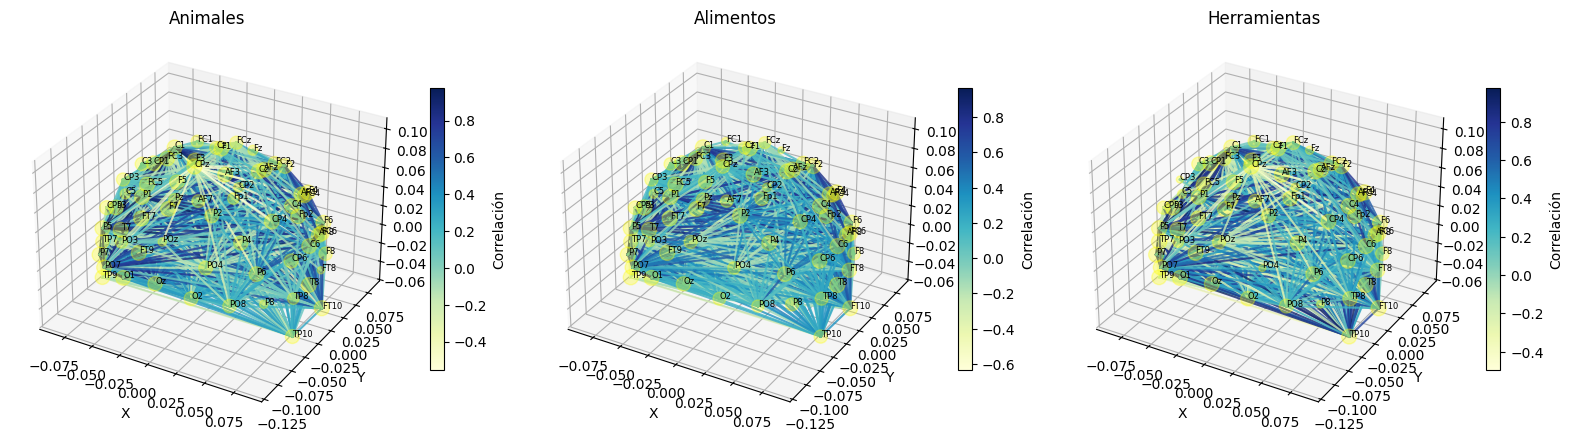

In [129]:
fig = plt.figure(figsize=(16, 5))

ax1 = fig.add_subplot(1, 3, 1, projection="3d")
ax2 = fig.add_subplot(1, 3, 2, projection="3d")
ax3 = fig.add_subplot(1, 3, 3, projection="3d")

plot_grafo_3d(animales_grafo_, eeg_coords, ax=ax1, title="Animales",)
plot_grafo_3d(alimentos_grafo_, eeg_coords, ax=ax2, title="Alimentos")
plot_grafo_3d(herramientas_grafo_, eeg_coords, ax=ax3, title="Herramientas")

plt.tight_layout()
plt.show()

In [148]:
def grafo_3d_nodos(G, coords_df, ax, node_size_base=100, title=None):
    """
    Dibuja SOLO nodos en 3D, con tamaño proporcional al grado, 
    sobre el eje 'ax' que se pasa como argumento.
    NO crea figuras nuevas.
    """
    # Nodos que existen en ambas partes
    nodos_validos = [n for n in G.nodes if n in coords_df.index]
    if len(nodos_validos) == 0:
        print("No hay nodos en común entre el grafo y eeg_coords.index")
        return

    # Grados
    degree_dict = dict(G.degree())
    max_degree = max(degree_dict.values()) if degree_dict else 1

    xs, ys, zs, sizes = [], [], [], []

    for n in nodos_validos:
        xs.append(coords_df.loc[n, "x"])
        ys.append(coords_df.loc[n, "y"])
        zs.append(coords_df.loc[n, "z"])
        sizes.append(node_size_base * (degree_dict[n] / max_degree + 0.2))

    # Dibujar nodos
    ax.scatter(xs, ys, zs, s=sizes, color="lightblue", alpha=0.3)

    # Etiquetas
    for n in nodos_validos:
        ax.text(coords_df.loc[n, "x"],
                coords_df.loc[n, "y"],
                coords_df.loc[n, "z"],
                n, fontsize=6)

    # Estética
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    if title:
        ax.set_title(title)

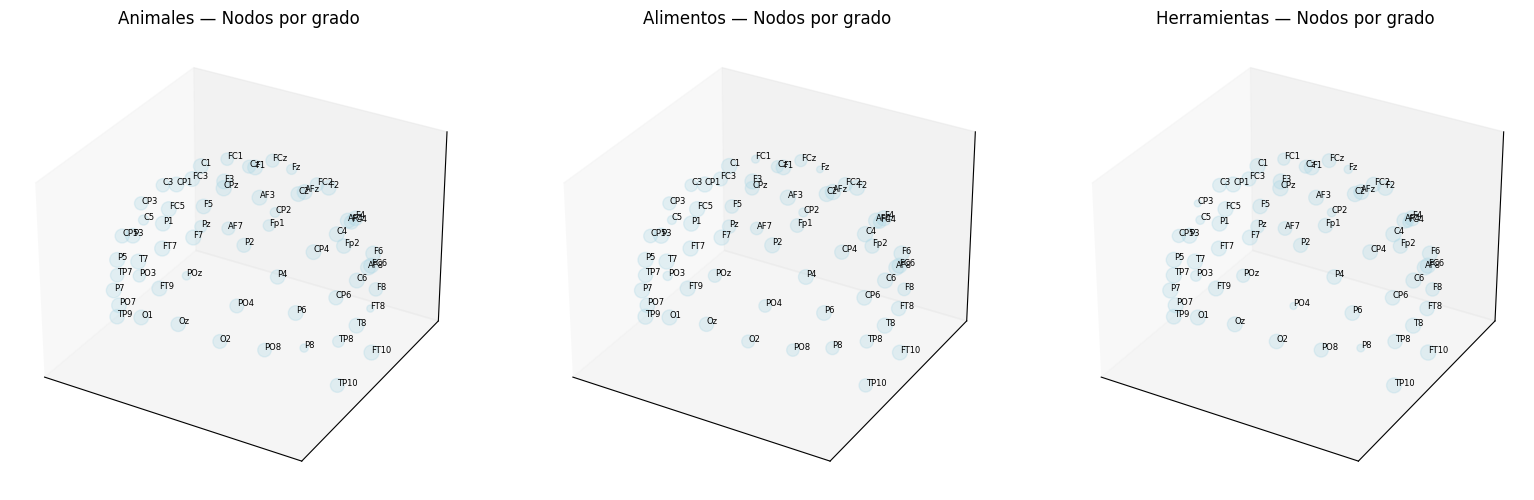

In [149]:
fig = plt.figure(figsize=(16, 5))

ax1 = fig.add_subplot(1, 3, 1, projection="3d")
ax2 = fig.add_subplot(1, 3, 2, projection="3d")
ax3 = fig.add_subplot(1, 3, 3, projection="3d")

grafo_3d_nodos(animales_grafo_, eeg_coords, ax=ax1, title="Animales — Nodos por grado")
grafo_3d_nodos(alimentos_grafo_, eeg_coords, ax=ax2, title="Alimentos — Nodos por grado")
grafo_3d_nodos(herramientas_grafo_, eeg_coords, ax=ax3, title="Herramientas — Nodos por grado")

plt.tight_layout()
plt.show()


